In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [6]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [8]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

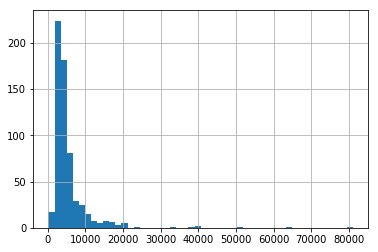

In [10]:
df['ApplicantIncome'].hist(bins=50)

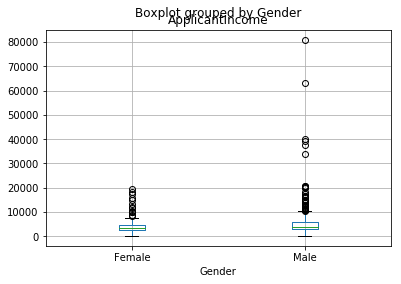

In [11]:
df.boxplot(column='ApplicantIncome', by = 'Gender')

According to above output, there are more men with more income 

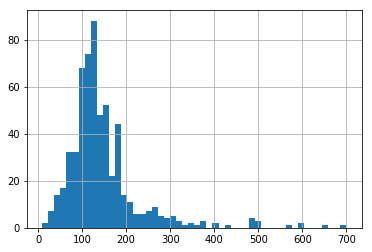

In [12]:
df['LoanAmount'].hist(bins=50)

X-axis: the values of loan amount Y-axis: the frequencies of different values of loan amount  

In [13]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [14]:
pt = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
pt

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


the probability of getting loan as per the credit history

In [15]:
ps=pt['Loan_Status']
ps

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

In [16]:
ch=df['Credit_History'].value_counts(ascending=True)

Text(0.5,1,'Probability of getting loan by credit history')

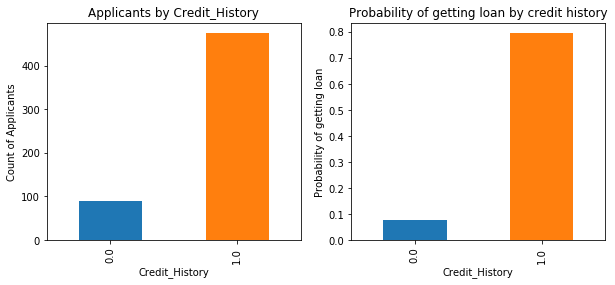

In [17]:
fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(1,2,1)
ch.plot(kind='bar')
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")


ax2 = fig.add_subplot(1,2,2)
ps.plot(kind='bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")


In [18]:
pv = df.pivot_table(values='Gender',index=['Credit_History'],aggfunc=lambda x: x.map({'Female':1,'Male':0}).mean())
pv

,Gender
Credit_History,
0.0,0.197674
1.0,0.180258


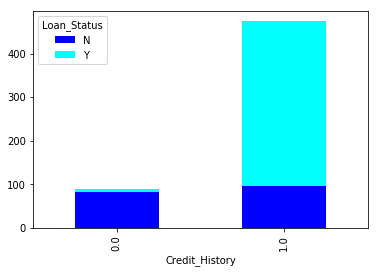

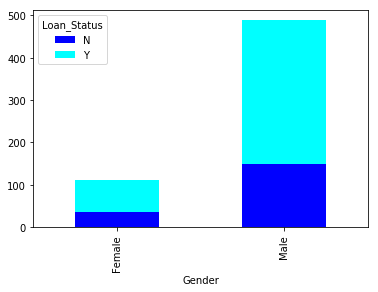

In [19]:
#combining the above 2 plots in a stacked chart
stack_chart = pd.crosstab(df['Credit_History'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['blue','cyan'], grid=False)
stack_chart = pd.crosstab(df['Gender'], df['Loan_Status'])
stack_chart.plot(kind='bar', stacked=True, color=['blue','cyan'], grid=False)

In [20]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

This shows the missing values in each column

In [21]:
#In order to fill the missing values by mean 
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [22]:
se = df['Self_Employed'].value_counts(ascending=True)
se.head()

Yes     82
No     500
Name: Self_Employed, dtype: int64

In [23]:
#since *no* has ~82% so, we will fill the missing values of this column with "no"
df.Self_Employed = df.Self_Employed.fillna('No')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


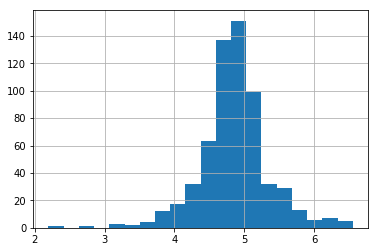

In [24]:
df['LoanAmount_log'] = np.log(df['LoanAmount']) 
df['LoanAmount_log'].hist(bins=20)

log function to reduce the extreme effect in Loan amount (which we saw in the previous barplot)

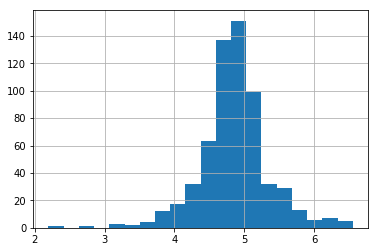

In [25]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

To decrease the extreme values of ApplicantIncome (which can be ssen from the previous barplot), 
we can add CoApplicantIncome to compensate the value 

In [26]:
df['Capacity%'] = ((df['LoanAmount'] / df['TotalIncome']) *100).astype(float) 
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026,2.503200
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568,2.101461
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368,2.200000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323,2.428658
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515,2.350000
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,5.587249,9613.0,9.170872,2.777489
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y,4.553877,3849.0,8.255569,2.468174
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N,5.062595,5540.0,8.619750,2.851986
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y,5.123964,5532.0,8.618305,3.036876
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N,5.855072,23809.0,10.077819,1.465832


This shows the capacity of each applicant of how well he/she is suited to pay back his loan.

In [27]:
#males are around ~81%, so we'll fill the missing values with "male"
df.Gender = df.Gender.fillna('Male')

In [28]:
gen = df['Gender'].value_counts(ascending=True)
gen.head()

Female    112
Male      502
Name: Gender, dtype: int64

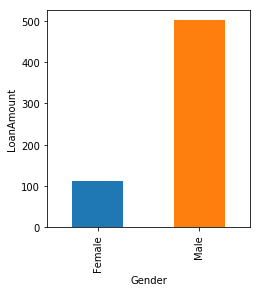

In [29]:
#which gender has more loan amount 
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)

ax1.set_xlabel('Gender')
ax1.set_ylabel('LoanAmount')

gen.plot(kind='bar')

In [30]:
md = df['Married'].value_counts(ascending=True)
md.head()

No     213
Yes    398
Name: Married, dtype: int64

In [31]:
#yes has ~65% 
#filling the missing values with yes
df.Married = df.Married.fillna('Yes')

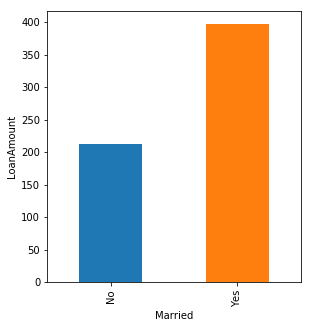

In [32]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)

ax1.set_xlabel('Married')
ax1.set_ylabel('LoanAmount')

md.plot(kind='bar')

In [33]:
loan = df['Loan_Status'].value_counts(ascending=True)
loan.head()

N    192
Y    422
Name: Loan_Status, dtype: int64

Considering the loan status, 1 represent for yes and 0 represent for no status.

In [34]:
df.Loan_Status = df.Loan_Status.fillna('1')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,4.862066,7024.705081,8.669414,2.401664
std,6109.041673,2926.248369,84.037468,65.12041,0.364878,0.496575,6458.663872,0.545102,0.894732
min,150.000000,0.000000,9.000000,12.00000,0.000000,2.197225,1442.000000,7.273786,0.252292
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,4.607658,4166.000000,8.334712,1.936150
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000,4.859812,5416.500000,8.597205,2.417435
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,5.104426,7521.750000,8.925549,2.834513
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,6.551080,81000.000000,11.302204,8.271164


In [35]:
df.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents            True
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
LoanAmount_log       False
TotalIncome          False
TotalIncome_log      False
Capacity%            False
dtype: bool

In [36]:
ch = df['Credit_History'].value_counts(ascending=True)
ch.head()

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [37]:
df.Credit_History = df.Credit_History.fillna('1.0')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1,Urban,Y,4.986426,5849.0,8.674026,2.503200
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1,Rural,N,4.852030,6091.0,8.714568,2.101461
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1,Urban,Y,4.189655,3000.0,8.006368,2.200000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1,Urban,Y,4.787492,4941.0,8.505323,2.428658
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1,Urban,Y,4.948760,6000.0,8.699515,2.350000


In [39]:
df.apply(lambda x: sum(x.isnull()),axis=0)


Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
Capacity%             0
dtype: int64

In [40]:
ch = df['Dependents'].value_counts(ascending=True)
ch

3+     51
2     101
1     102
0     345
Name: Dependents, dtype: int64

In [41]:
df.Dependents = df.Dependents.fillna('0')

In [42]:
ch = df['Loan_Amount_Term'].value_counts(ascending=True)
ch

12.0       1
60.0       2
36.0       2
120.0      3
240.0      4
84.0       4
300.0     13
480.0     15
180.0     44
360.0    512
Name: Loan_Amount_Term, dtype: int64

In [43]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna('360.0')

In [44]:

#building predictive model 
#we will use scikit-learn, for which we need to convert the categorical values into numerical values

from sklearn.preprocessing import LabelEncoder
var_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()  #Encode labels with value between 0 and n_classes-1.
for i in var_col:
    df[i] = le.fit_transform(df[i]) #Fit label encoder and return encoded labels
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
Capacity%            float64
dtype: object

In [45]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log,Capacity%
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360,1,2,1,4.986426,5849.0,8.674026,2.503200
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360,1,0,0,4.852030,6091.0,8.714568,2.101461
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360,1,2,1,4.189655,3000.0,8.006368,2.200000
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360,1,2,1,4.787492,4941.0,8.505323,2.428658
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360,1,2,1,4.948760,6000.0,8.699515,2.350000


In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [48]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    
    for train, test in kf:
        train_predictors = (data[predictors].iloc[train,:])
        train_target = data[outcome].iloc[train]
        model.fit(train_predictors, train_target)
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

In [53]:
#using Logistic reasoning 
outcome_var = ['Loan_Status']
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [54]:
#using Logistic reasoning 
outcome_var = ['Loan_Status']
model = LogisticRegression()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [55]:
#using Decision Tree
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [56]:
model = DecisionTreeClassifier()
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 68.569%


In [57]:
#using Random Forest 
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.019%


In [58]:
#using Random Forest 
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 69.544%
Cross-Validation Score : 67.752%
